# Objective
- The primary goal is to predict whether individuals are employed or not based on relevant features and attributes.

Dataset:- https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import os
import shutil

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [5]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Importing data

In [7]:
dataset=pd.read_csv("stackoverflow_full.csv")

# Knowing the data

#### How big is the data

In [8]:
dataset.shape

(73462, 15)

#### How does the data look like

In [9]:
dataset.head(10)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,5,<35,No,Master,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [10]:
dataset.tail()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1
73461,73461,<35,No,Master,1,NonBinary,No,Dev,10,3,United Kingdom of Great Britain and Northern I...,75384.0,Python;Docker,2,0


In [11]:
dataset.sample(5)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
4441,4441,>35,No,Undergraduate,1,Man,No,Dev,20,8,United States of America,130000.0,HTML/CSS;JavaScript;Node.js;Python;Git;React.j...,9,0
10780,10780,>35,No,Undergraduate,1,Man,No,NotDev,20,15,Canada,113447.0,Bash/Shell;Go;Perl;Python;Rust;SQL;Docker;Git;...,13,0
34318,34318,>35,No,Master,1,Man,No,Dev,19,11,India,121836.0,C;C#;C++;JavaScript;PHP;jQuery;MariaDB;MongoDB...,9,1
22677,22677,>35,No,Master,1,Man,No,Dev,23,15,Japan,98922.0,JavaScript;Node.js;PHP;SQL;TypeScript;Docker;G...,11,0
39704,39704,<35,No,Undergraduate,1,Man,Yes,Dev,12,8,Netherlands,54480.0,Bash/Shell;C#;PowerShell;SQL;Docker;Git;Kubern...,16,1


#### What is the datatyoe of cols

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


#### Are there any missing values

In [13]:
dataset.isnull().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

#### How the data look like mathematically

In [14]:
dataset.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


#### Are there duplicate values?

In [15]:
dataset.duplicated().sum()

0

#### How is the correlation between columns?


In [16]:
dataset['PreviousSalary'] = dataset['PreviousSalary'].astype('int')
selected_columns = ['YearsCodePro', 'ComputerSkills', 'YearsCode', 'PreviousSalary', 'Employed']
selected_data = dataset[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)

                YearsCodePro  ComputerSkills  YearsCode  PreviousSalary  \
YearsCodePro        1.000000       -0.012838   0.901073        0.393615   
ComputerSkills     -0.012838        1.000000  -0.020460        0.030362   
YearsCode           0.901073       -0.020460   1.000000        0.390855   
PreviousSalary      0.393615        0.030362   0.390855        1.000000   
Employed            0.002886        0.585545  -0.003756        0.000379   

                Employed  
YearsCodePro    0.002886  
ComputerSkills  0.585545  
YearsCode      -0.003756  
PreviousSalary  0.000379  
Employed        1.000000  


[]

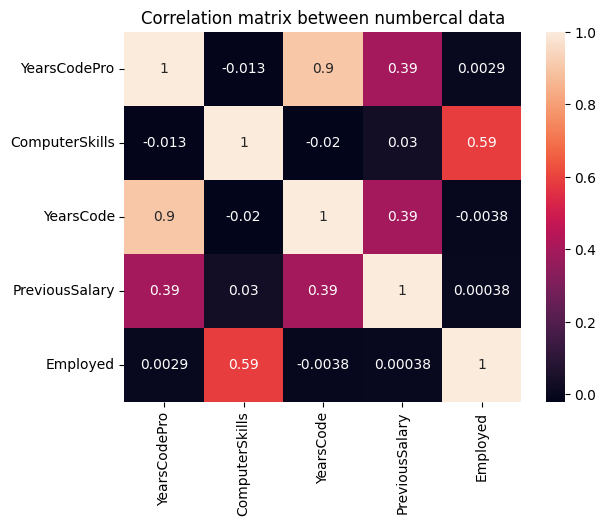

In [17]:
plt.title("Correlation matrix between numbercal data")

sns.heatmap(correlation_matrix,annot=True,)
plt.plot()

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [18]:
def plot_univariate_analysis(data, column, plot_type='countplot', another_column=None):

    plt.figure(figsize=(12, 6))

    if plot_type == 'countplot':
        sns.countplot(data=data, x=column)
        plt.title(f'Count Plot for {column}')
    elif plot_type == 'piechart':
        data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart for {column}')
    elif plot_type == 'histogram':
        sns.histplot(data=data, x=column, kde=False, bins=20)
        plt.title(f'Histogram for {column}')
    elif plot_type == 'distplot':
        sns.distplot(data[column].dropna(), kde=False, bins=20)
        plt.title(f'Distribution Plot for {column}')
    elif plot_type == 'boxplot':
        sns.boxplot(data=data, x=column)
        plt.title(f'Box Plot for {column}')
    elif plot_type == 'kdeplot':
        sns.kdeplot(data[column].dropna())
        plt.title(f'Kernel Density Estimation (KDE) Plot for {column}')
    elif plot_type == 'ecdfplot':
        sns.ecdfplot(data[column].dropna())
        plt.title(f'Empirical Cumulative Distribution Function (ECDF) Plot for {column}')
    elif plot_type == 'swarmplot':
        sns.swarmplot(data=data, x=column)
        plt.title(f'Swarm Plot for {column}')
    elif plot_type == 'rugplot':
        sns.rugplot(data[column].dropna())
        plt.title(f'Rug Plot for {column}')
    else:
        print("Invalid plot type. Choose from 'countplot', 'piechart', 'histogram', 'distplot', 'boxplot', 'barplot', 'pointplot', 'violinplot', 'kdeplot', 'ecdfplot', 'swarmplot', 'rugplot'.")

    plt.show()


### Categorical Data


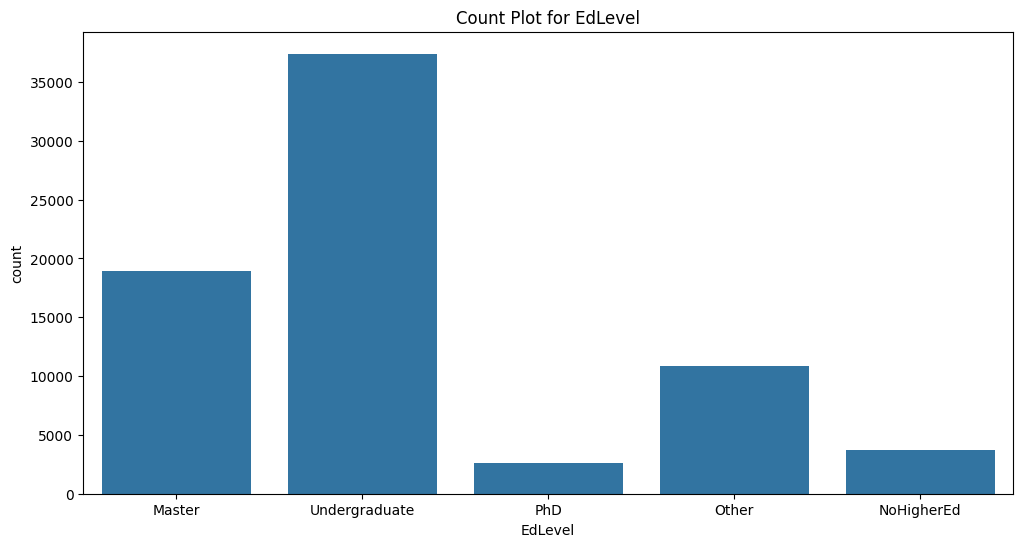

In [19]:
# Countplot
plot_univariate_analysis(dataset, 'EdLevel', plot_type='countplot')



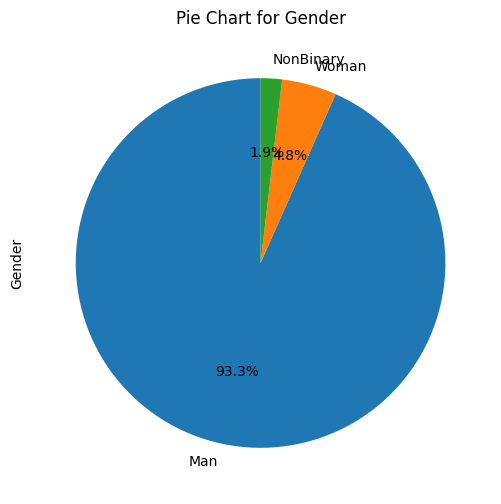

In [20]:
# Piechart
plot_univariate_analysis(dataset, 'Gender', plot_type='piechart')


### Numerical Data


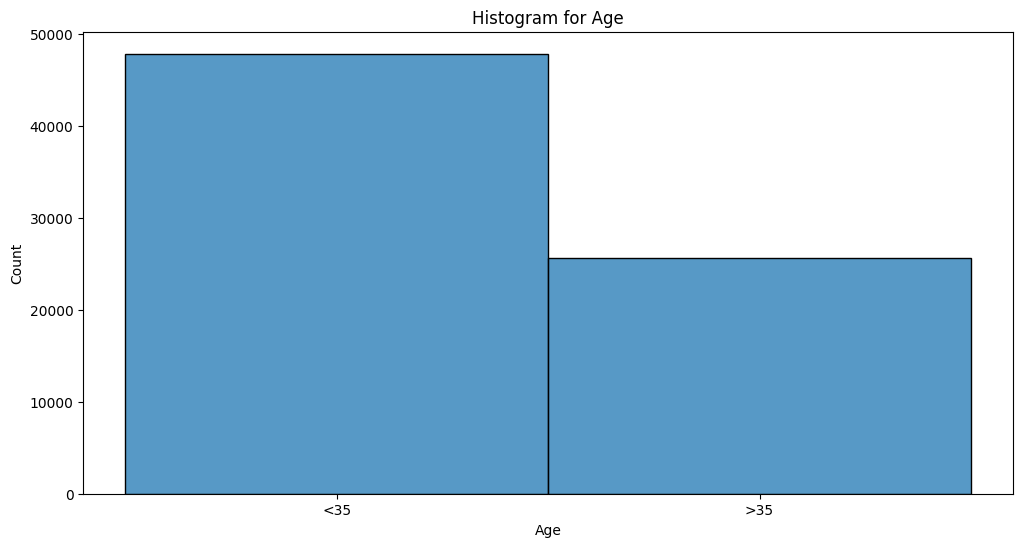

In [21]:
# Histogram
plot_univariate_analysis(dataset, 'Age', plot_type='histogram')


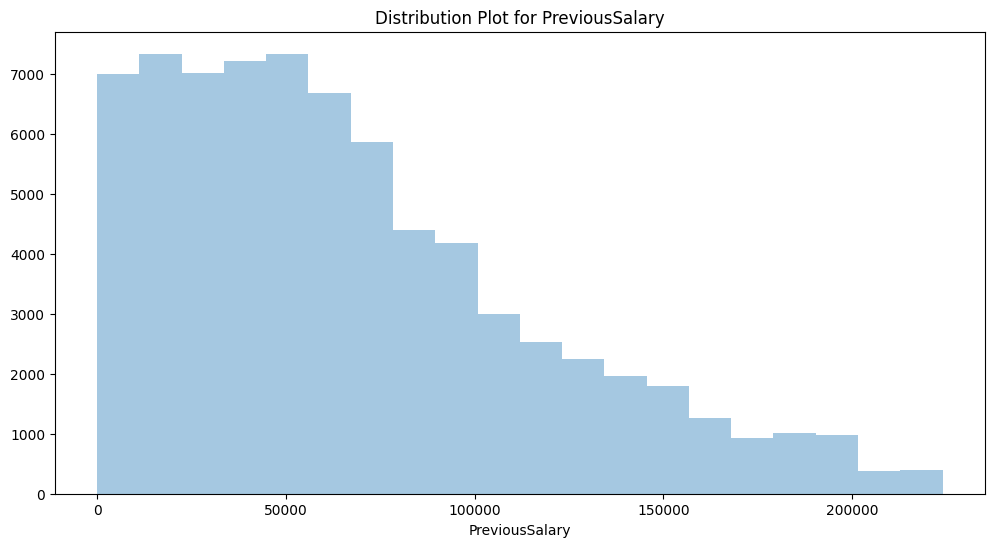

In [22]:
# Distplot
plot_univariate_analysis(dataset, 'PreviousSalary', plot_type='distplot')


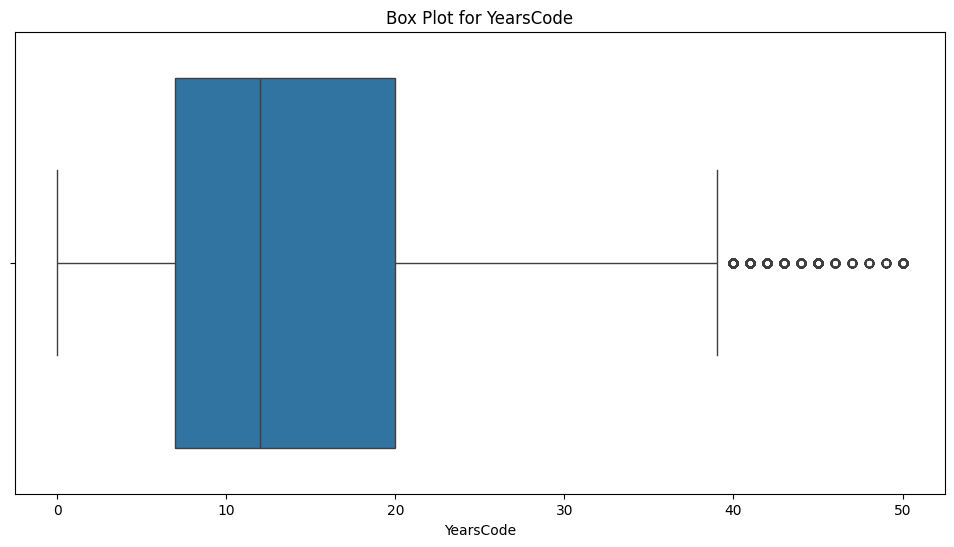

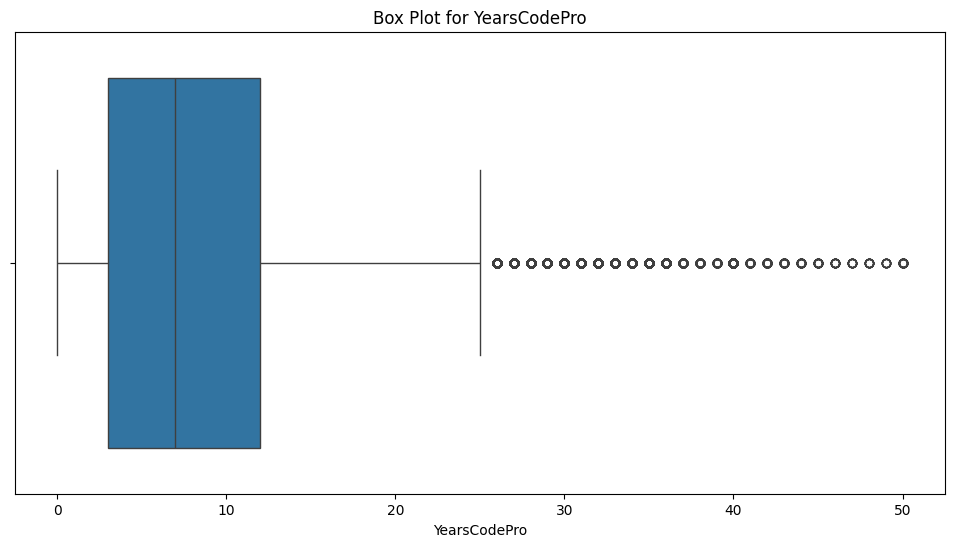

In [23]:
# BoxPlot
plot_univariate_analysis(dataset, 'YearsCode', plot_type='boxplot')
plot_univariate_analysis(dataset, 'YearsCodePro', plot_type='boxplot')


## Biavariate Analysis

In [24]:
def plot_bivariate_analysis(data, x, y=None, plot_type='scatter', palette='Set1'):
    plt.figure(figsize=(12, 6))

    if plot_type == 'scatter':
        sns.scatterplot(data=data, x=x, y=y, palette=palette)
        plt.title(f'Scatter Plot for {x} vs {y}')
    elif plot_type == 'bar':
        sns.barplot(data=data, x=x, y=y, palette=palette)
        plt.title(f'Bar Plot for {x} vs {y}')
    elif plot_type == 'box':
        sns.boxplot(data=data, x=x, y=y, palette=palette)
        plt.title(f'Box Plot for {x} vs {y}')
    elif plot_type == 'dist':
        sns.histplot(data=data, x=x, y=y, kde=True, palette=palette)
        plt.title(f'Distribution Plot for {x} vs {y}')
    elif plot_type == 'lineplot':
        sns.lineplot(data=data, x=x, y=y, palette=palette)
        plt.title(f'Line Plot for {x} vs {y}')
    elif plot_type == 'violin':
        sns.violinplot(data=data, x=x, y=y, palette=palette)
        plt.title(f'Violin Plot for {x} vs {y}')
    elif plot_type == 'jointplot':
        sns.jointplot(data=data, x=x, y=y, kind='scatter', marginal_kws=dict(bins=25, fill=False), palette=palette)
        plt.title(f'Joint Plot for {x} vs {y}')
    elif plot_type == 'kde':
        sns.kdeplot(data=data, x=x, y=y, fill=True, cmap=palette)
        plt.title(f'Kernel Density Plot for {x} vs {y}')
    elif plot_type=='heatmap':
      sns.heatmap(data=data,x=x,y=y,palette=palette)

    else:
        print("Invalid plot type. Choose from 'scatter', 'bar', 'box', 'dist', 'lineplot', 'violin', 'jointplot', 'kde', and more.")

    plt.show()

### Categorical and Numerical Data


<ipython-input-24-68f3068ab9ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette)


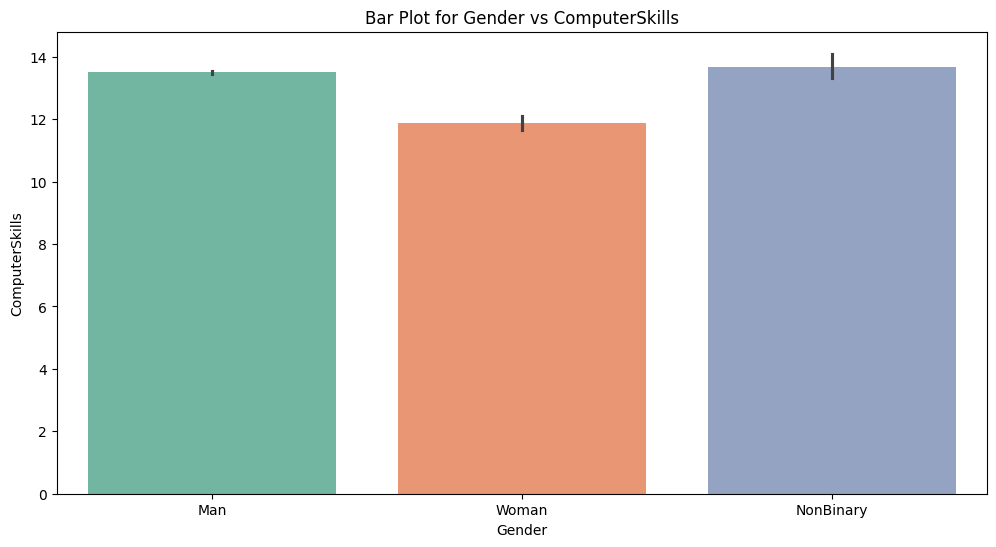

In [25]:
plot_bivariate_analysis(dataset, x='Gender', y='ComputerSkills', plot_type='bar', palette='Set2')


<ipython-input-24-68f3068ab9ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, palette=palette)


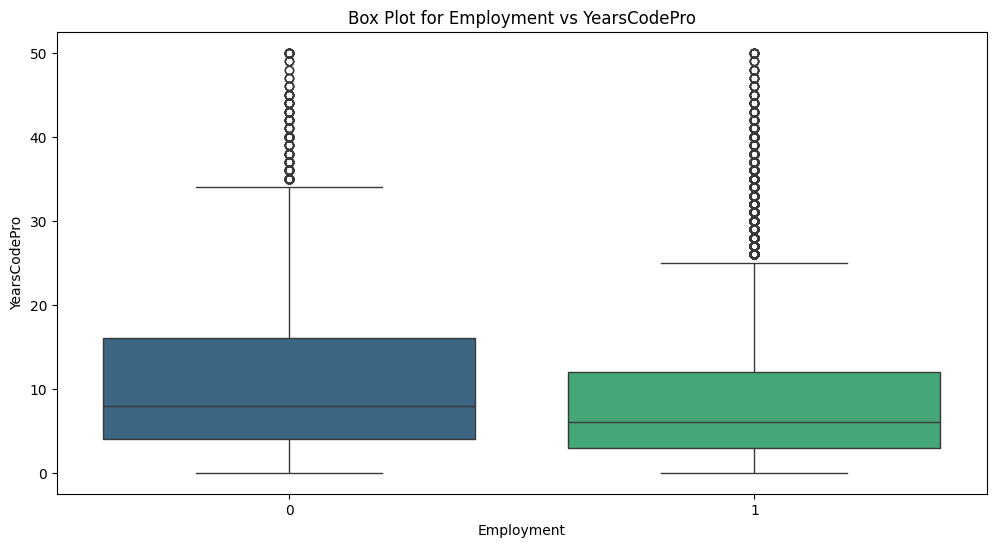

In [26]:
plot_bivariate_analysis(dataset, x='Employment', y='YearsCodePro', plot_type='box', palette='viridis')



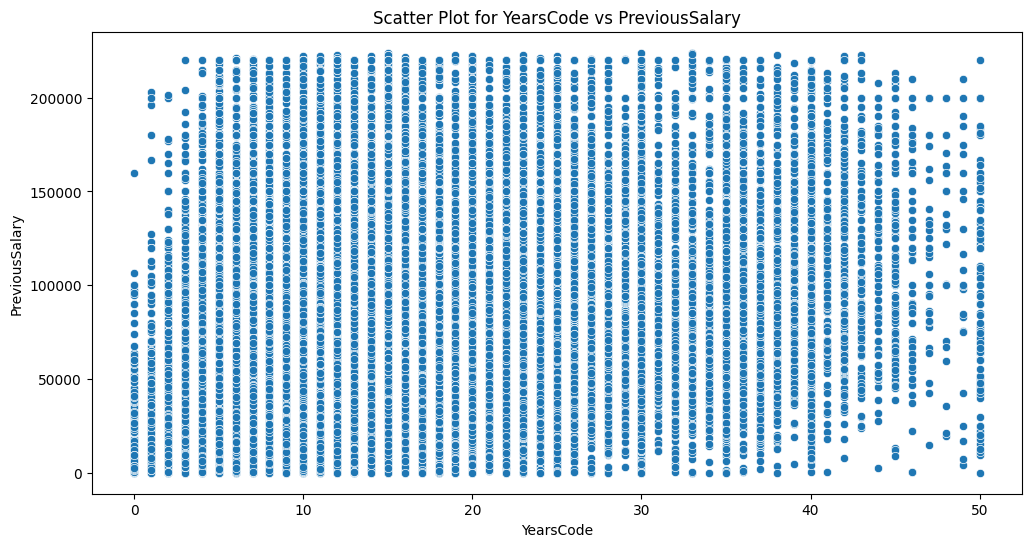

In [27]:
plot_bivariate_analysis(dataset, x='YearsCode', y='PreviousSalary', plot_type='scatter', palette='magma')


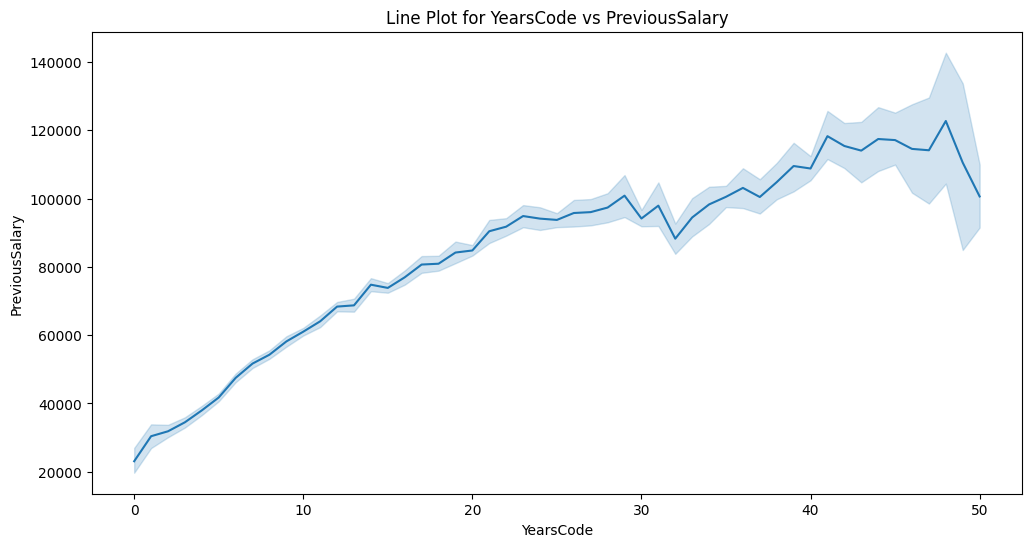

In [28]:
plot_bivariate_analysis(dataset, x='YearsCode', y='PreviousSalary', plot_type='lineplot', palette='plasma')


<ipython-input-24-68f3068ab9ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, palette=palette)


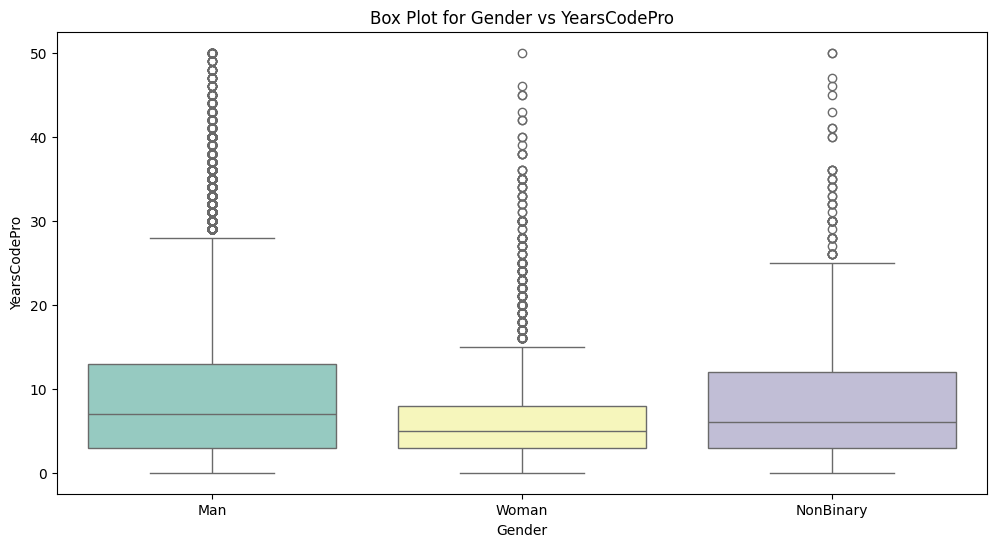

In [29]:
plot_bivariate_analysis(dataset, x='Gender', y='YearsCodePro', plot_type='box', palette='Set3')


<ipython-input-24-68f3068ab9ac>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, palette=palette)


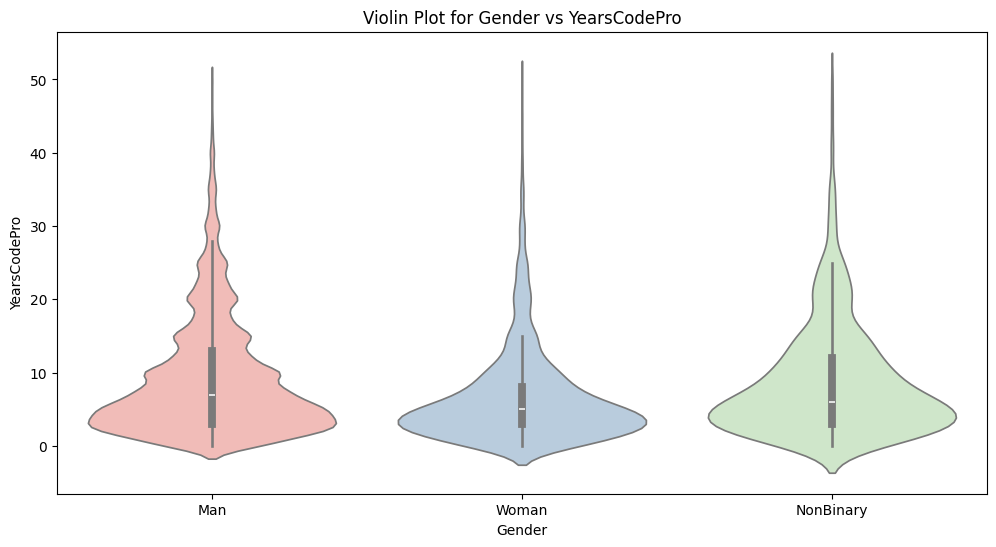

In [30]:
plot_bivariate_analysis(dataset, x='Gender', y='YearsCodePro', plot_type='violin', palette='Pastel1')


<ipython-input-24-68f3068ab9ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette)


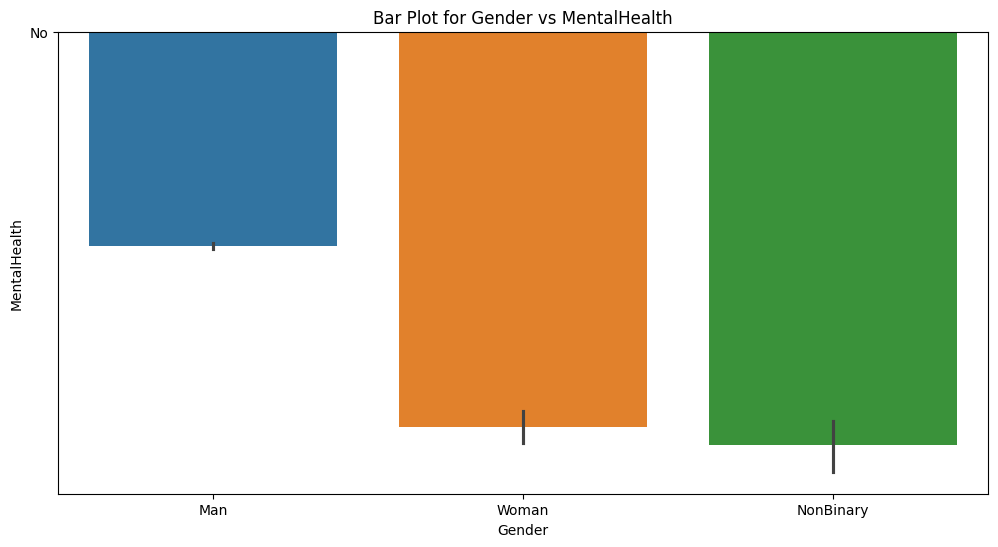

In [31]:
plot_bivariate_analysis(dataset, x='Gender', y='MentalHealth', plot_type='bar', palette='tab10')


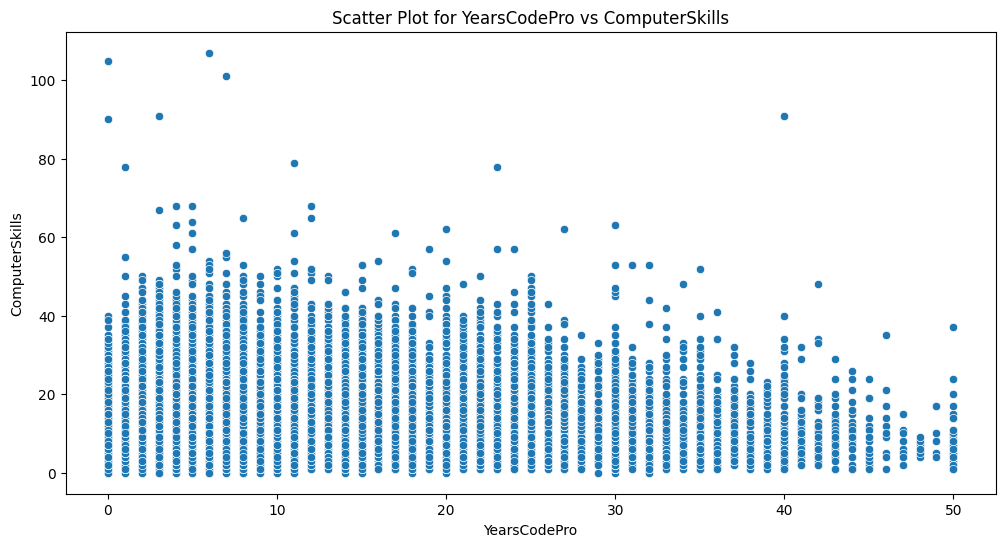

In [32]:
plot_bivariate_analysis(dataset, x='YearsCodePro', y='ComputerSkills', plot_type='scatter', palette='viridis')


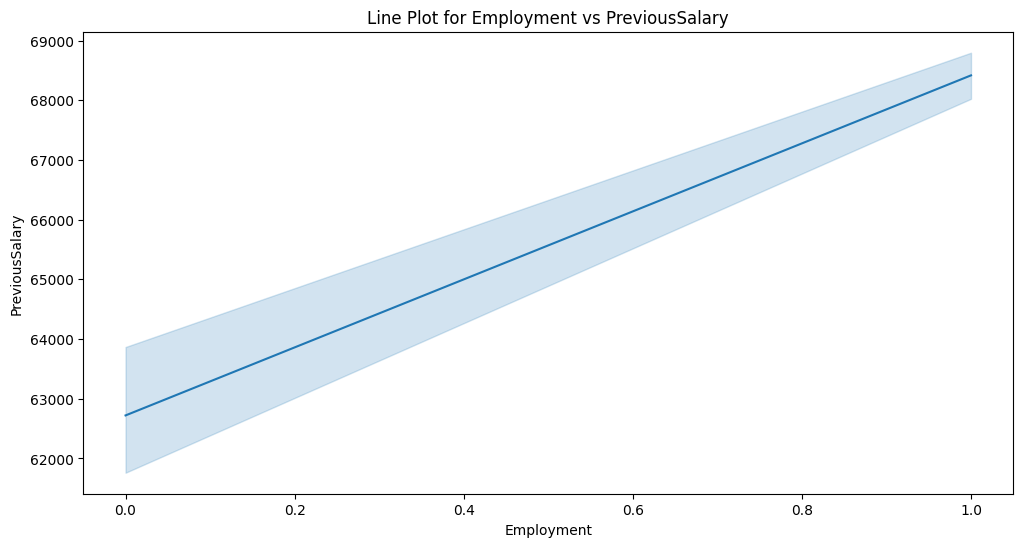

In [33]:
plot_bivariate_analysis(dataset, x='Employment', y='PreviousSalary', plot_type='lineplot', palette='plasma')


<ipython-input-24-68f3068ab9ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, palette=palette)


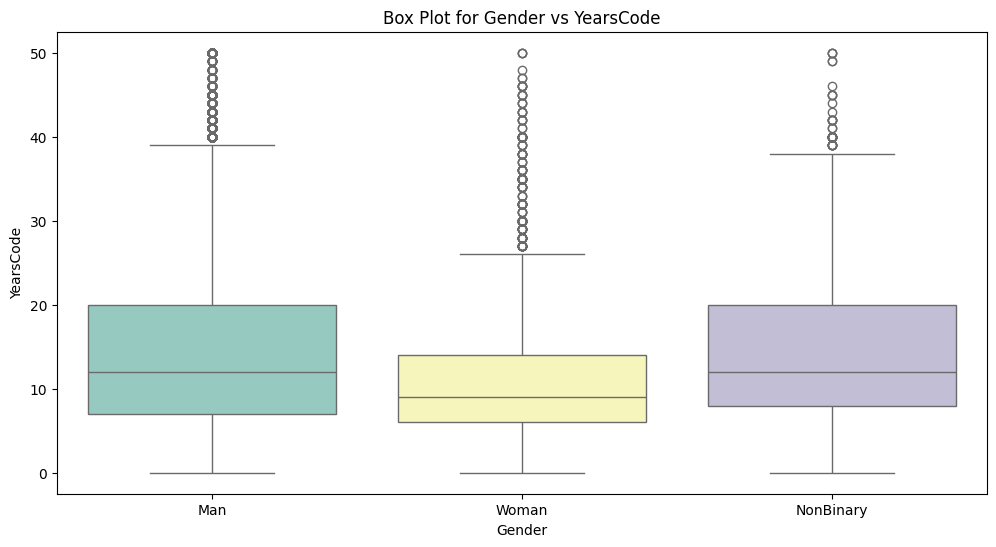

In [34]:
plot_bivariate_analysis(dataset, x='Gender', y='YearsCode', plot_type='box', palette='Set3')


<ipython-input-24-68f3068ab9ac>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, palette=palette)


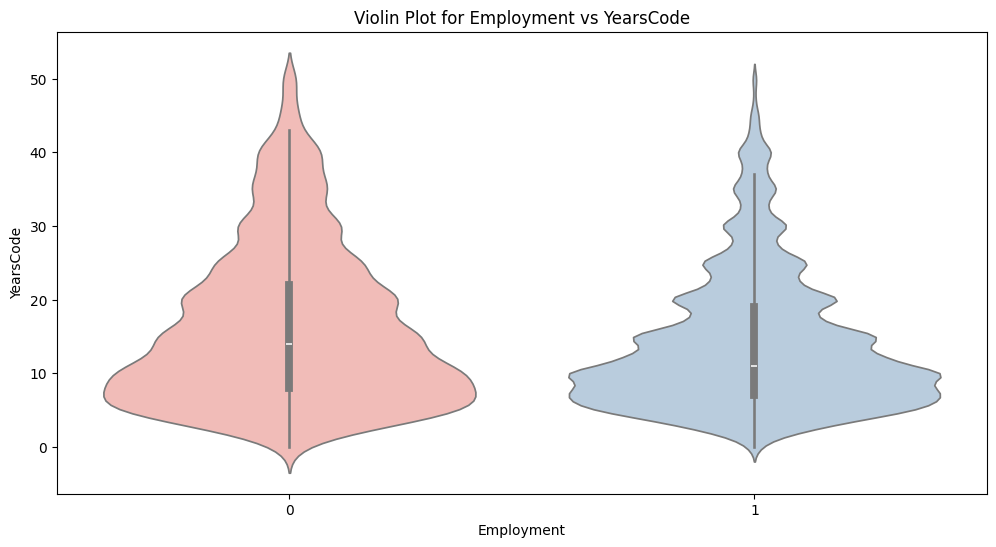

In [35]:
plot_bivariate_analysis(dataset, x='Employment', y='YearsCode', plot_type='violin', palette='Pastel1')


<ipython-input-24-68f3068ab9ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette)


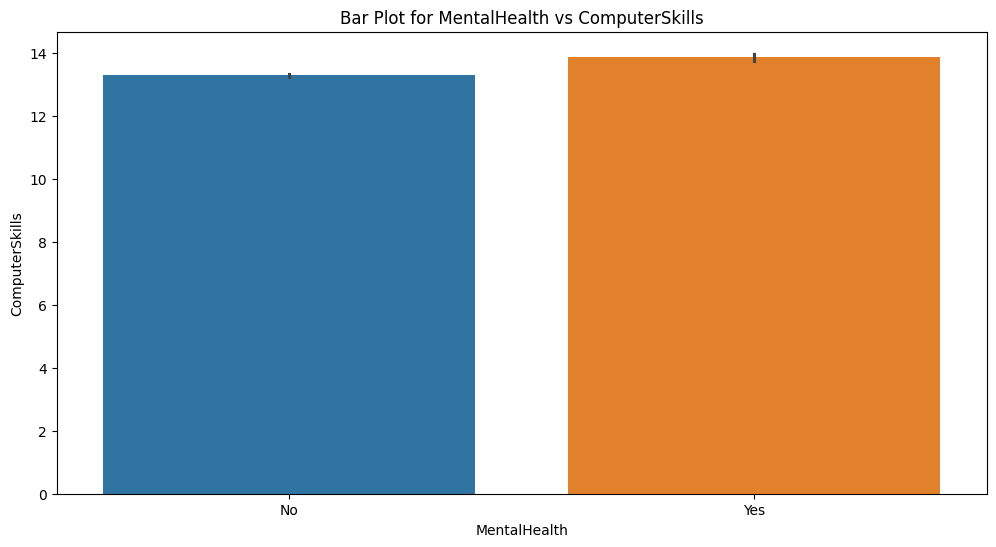

In [36]:
plot_bivariate_analysis(dataset, x='MentalHealth', y='ComputerSkills', plot_type='bar', palette='tab10')


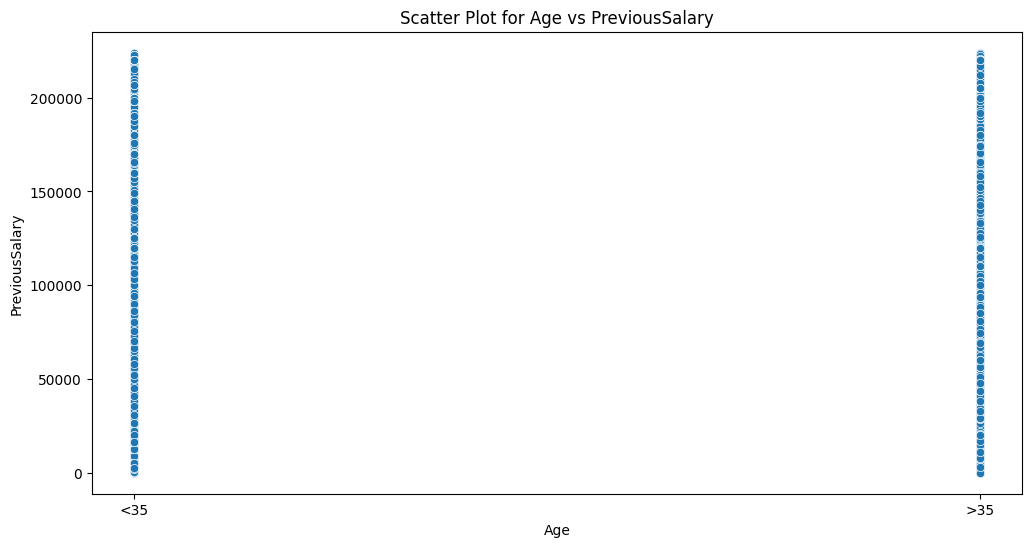

In [37]:
plot_bivariate_analysis(dataset, x='Age', y='PreviousSalary', plot_type='scatter', palette='Blues')


## Multivariate Analysis

In [38]:
def plot_multivariate_analysis(data, plot_type='heatmap', palette=None, reverse_palette=False):
    plt.figure(figsize=(12, 6))

    if palette:
        palette = sns.color_palette(palette, as_cmap=True)
        if reverse_palette:
            palette = palette.reversed()

    if plot_type == 'heatmap':
        plt.title('Correlation Heatmap')
        sns.heatmap(data.corr(), annot=True, cmap=palette, linewidths=0.5)
    elif plot_type == 'clustermap':
        plt.title('Clustermap')
        sns.clustermap(data.corr(), cmap=palette, linewidths=0.5)
    elif plot_type == 'pairplot':
        plt.title('Pair Plot')
        sns.pairplot(data, palette=palette)
    elif plot_type == 'jointplot':
        plt.title('Joint Plot')
        sns.jointplot(data=data, x='Age', y='PreviousSalary', kind='scatter', palette=palette)
    elif plot_type == 'kde_pairplot':
        plt.title('KDE Pair Plot')
        sns.pairplot(data, diag_kind='kde', palette=palette)
    elif plot_type == 'rug_pairplot':
        plt.title('Rug KDE Pair Plot')
        sns.pairplot(data, diag_kind='kde', diag_kws={'rug': True}, palette=palette)
    elif plot_type == 'hexbin':
        plt.title('Hexbin Joint Plot')
        sns.jointplot(data=data, x='Age', y='PreviousSalary', kind='hex', cmap=palette)
    elif plot_type == 'violin_jointplot':
        plt.title('Violin Joint Plot')
        sns.jointplot(data=data, x='Age', y='PreviousSalary', kind='violin', palette=palette)
    elif plot_type == 'scatter':
        plt.title('Scatter Plot')
        sns.scatterplot(data=data, x='Age', y='PreviousSalary', palette=palette)
    else:
        print("Invalid plot type. Choose from 'heatmap', 'clustermap', 'pairplot', 'jointplot', 'kde_pairplot', 'rug_pairplot', 'hexbin', 'violin_jointplot', and more.")

    plt.show()

### Categorical Data and numerical Data


<ipython-input-38-08249e4bf3b9>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=palette, linewidths=0.5)


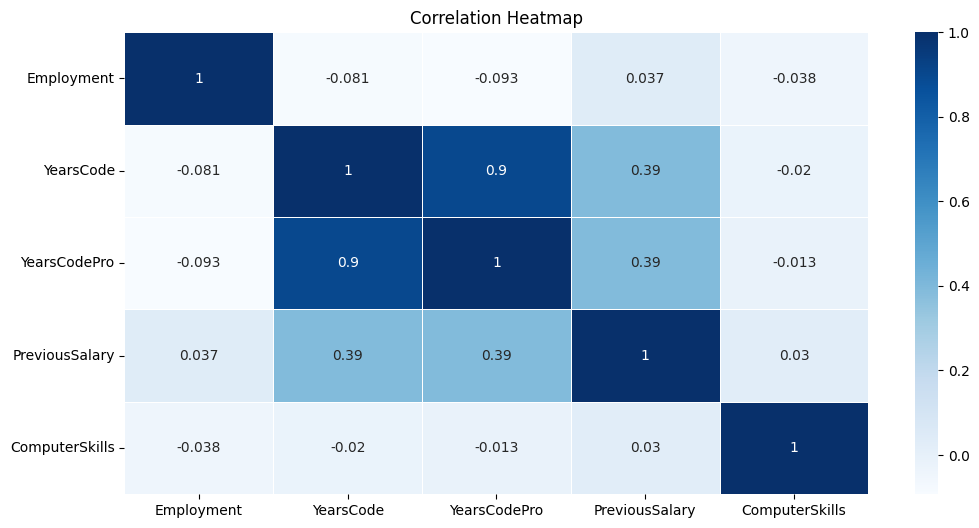

In [39]:
plot_multivariate_analysis(dataset[['Age', 'Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']],
                           plot_type='heatmap',
                           palette='Blues')

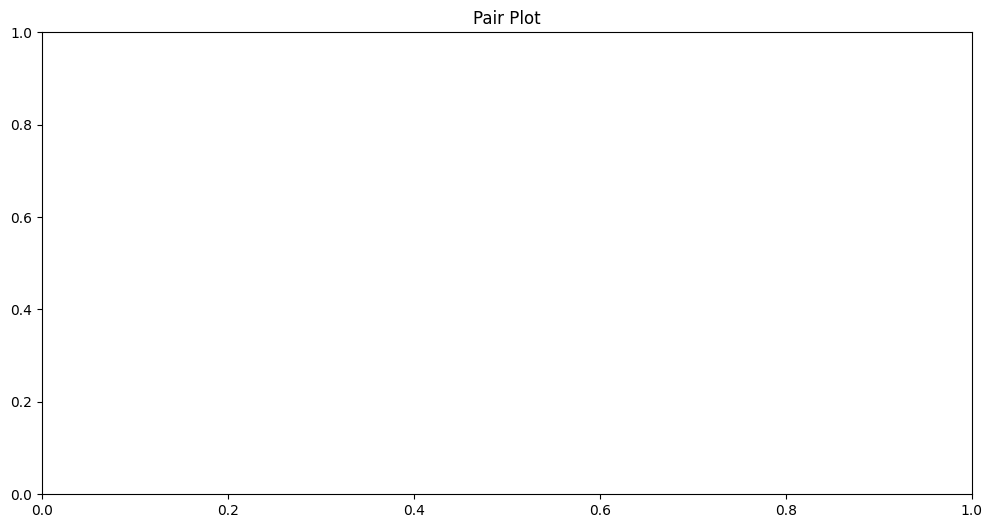

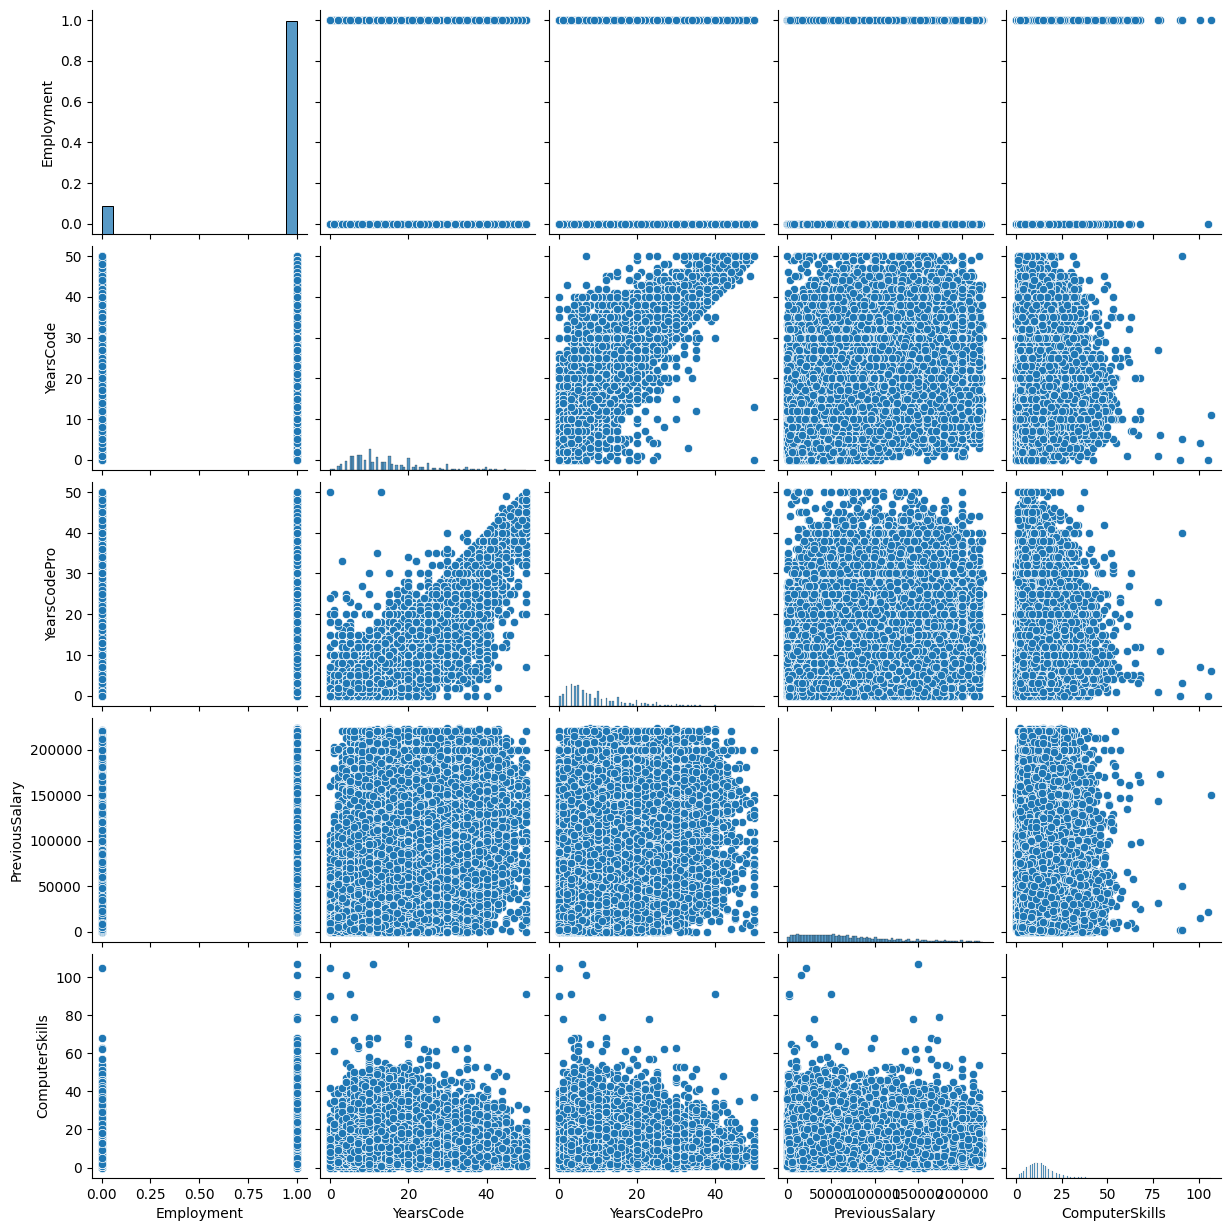

In [40]:
plot_multivariate_analysis(dataset[['Age', 'Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']],
                           plot_type='pairplot',
                           palette='Set2')

### Numerical Data


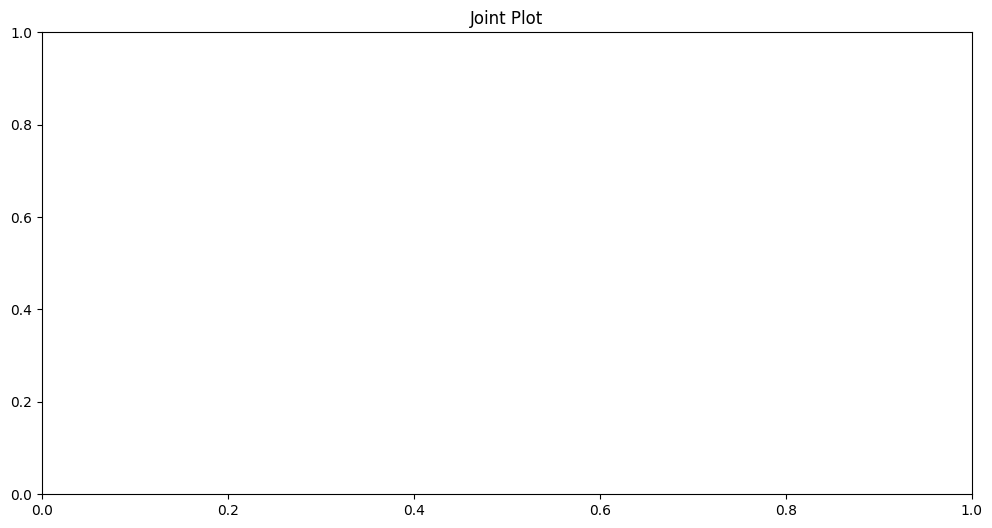

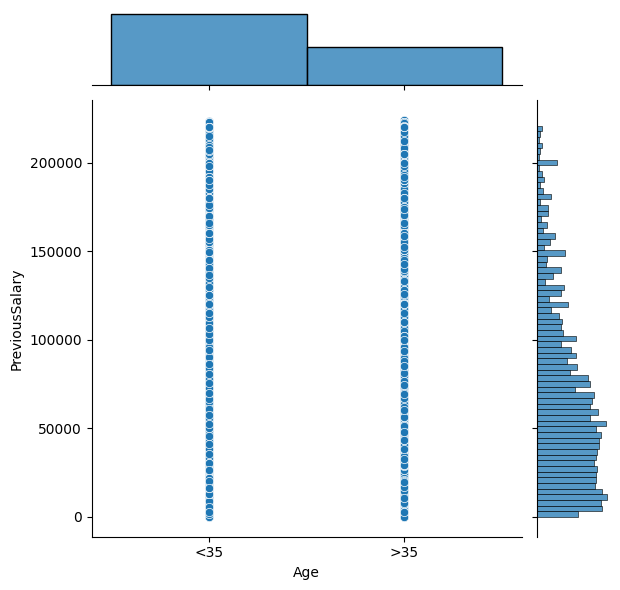

In [41]:
plot_multivariate_analysis(dataset[['Age', 'PreviousSalary']],
                           plot_type='jointplot',
                           palette='Oranges')

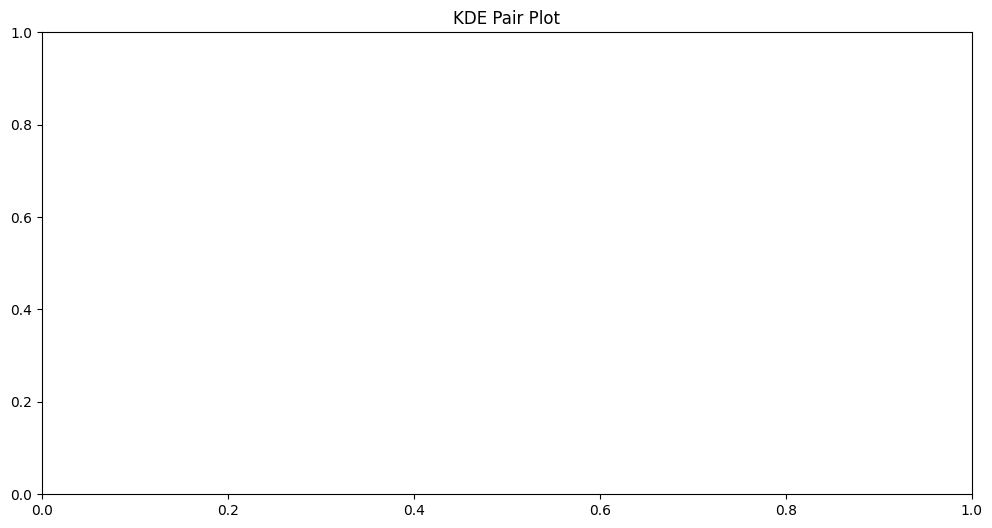

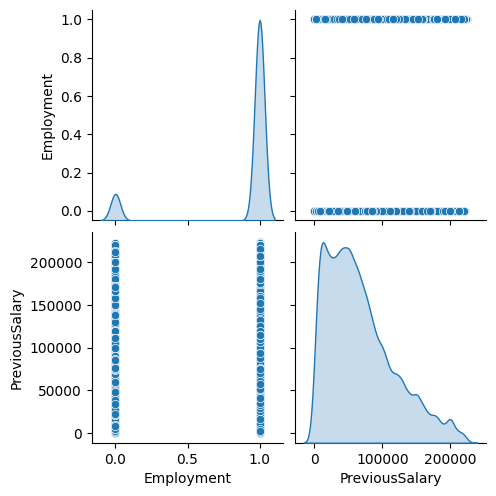

In [42]:
plot_multivariate_analysis(dataset[['Age', 'Employment', 'PreviousSalary']],
                           plot_type='kde_pairplot',
                           palette='Purples')


## EDA Using SweetViz

In [43]:
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.5 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

my_report = sv.analyze(dataset
                       )
my_report.show_html('eda.html')

# Feature Engineering

## Feature Transformation

#### Missing Value Imputation

In [45]:
data=dataset

In [46]:
data=data.dropna()
data = data.drop(columns=['Unnamed: 0','YearsCode'])

In [47]:
data.isnull().sum()


Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCodePro      0
Country           0
PreviousSalary    0
HaveWorkedWith    0
ComputerSkills    0
Employed          0
dtype: int64

#### Handling Categorical Feature

In [48]:
tfidf_vectorizer = TfidfVectorizer()


In [49]:

text_col = 'HaveWorkedWith'
categorical_cols = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country']
ordinal_cols = ['YearsCodePro']

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), text_col),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ])

X = preprocessor.fit_transform(data)

# Get feature names for the resulting dataframe
text_feature_names = preprocessor.named_transformers_['tfidf'].get_feature_names_out([text_col])
categorical_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
ordinal_feature_names = ordinal_cols

columns = text_feature_names.tolist() + categorical_feature_names.tolist() + ordinal_feature_names

df = pd.DataFrame(X.toarray(), columns=columns)

In [50]:
df.isnull().sum()

3d                  0
angular             0
ansible             0
apl                 0
asp                 0
                   ..
Country_Viet Nam    0
Country_Yemen       0
Country_Zambia      0
Country_Zimbabwe    0
YearsCodePro        0
Length: 312, dtype: int64

In [51]:
columns_to_remove = [text_col] + categorical_cols + ordinal_cols
data_cleaned = data.drop(columns=columns_to_remove)

data_cleaned_reset = data_cleaned.reset_index(drop=True)
df_reset = df.reset_index(drop=True)

merged_data = pd.concat([data_cleaned_reset, df_reset], axis=1)


#### Feature Scaling and Outlier Detection

Here I'm using tree-based arithmetic, so scaling and outlier is not that important for a decision tree.

## Feature Selection

## Feature Construction

### Feature Splitting

In [52]:
columns_to_drop = ["Employed"]
X_merged_data = merged_data.drop(columns=columns_to_drop)
y_merged_data = merged_data["Employed"]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_merged_data, y_merged_data, test_size=0.3, random_state=42)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.3,random_state=42)


## Feature Extraction

### PCA,LDA

- PCA LDA is also not very applicable for tree ensembles, so we can skip the process.

In [54]:
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(merged_data)

# Modeling

## Decision Tree

In [55]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model = DecisionTreeClassifier()

search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
search.fit(X_train, y_train)

best_model = search.best_estimator_

print("Best Hyperparameters:", search.best_params_)

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}


# Model Evaluation

## Confusion Matrix

In [56]:
y_pred_train_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
conf_matrix_train = confusion_matrix(y_train, y_pred_train_cv)
precision_train = precision_score(y_train, y_pred_train_cv)
recall_train = recall_score(y_train, y_pred_train_cv)
f1_train = f1_score(y_train, y_pred_train_cv)

# Validation set predictions and metrics
y_pred_val_cv = cross_val_predict(best_model, X_val, y_val, cv=5)
conf_matrix_val = confusion_matrix(y_val, y_pred_val_cv)
precision_val = precision_score(y_val, y_pred_val_cv)
recall_val = recall_score(y_val, y_pred_val_cv)
f1_val = f1_score(y_val, y_pred_val_cv)

# Print metrics for both sets
print("Training Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

print("\nValidation Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

Training Set Metrics:
Confusion Matrix:
[[20839  3015]
 [ 4095 23430]]
Precision: 0.8859897901304594
Recall: 0.8512261580381472
F1 Score: 0.8682601445247359

Validation Set Metrics:
Confusion Matrix:
[[2511  529]
 [ 645 2921]]
Precision: 0.8466666666666667
Recall: 0.819125070106562
F1 Score: 0.8326681870011402


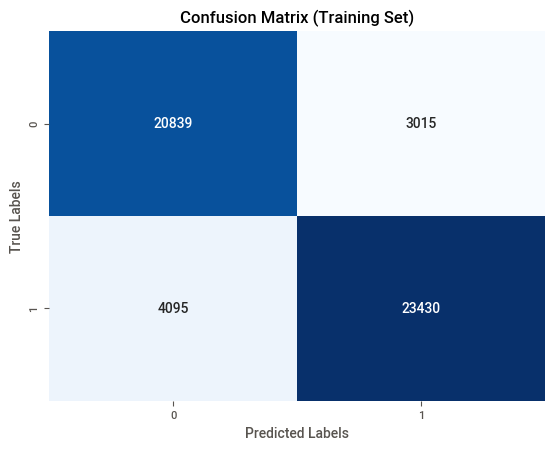

In [57]:

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Training Set)')
plt.show()


In [58]:
# Print and plot results for validation set
print("\nValidation Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)




Validation Set Metrics:
Confusion Matrix:
[[2511  529]
 [ 645 2921]]
Precision: 0.8466666666666667
Recall: 0.819125070106562
F1 Score: 0.8326681870011402


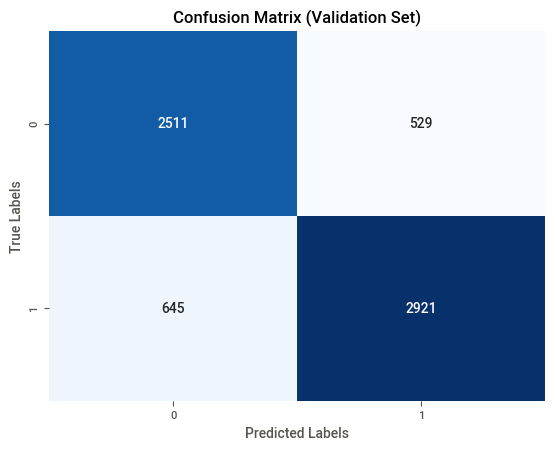

In [59]:
# Plot the Confusion Matrix for validation set
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

## Precision-Recall Curve

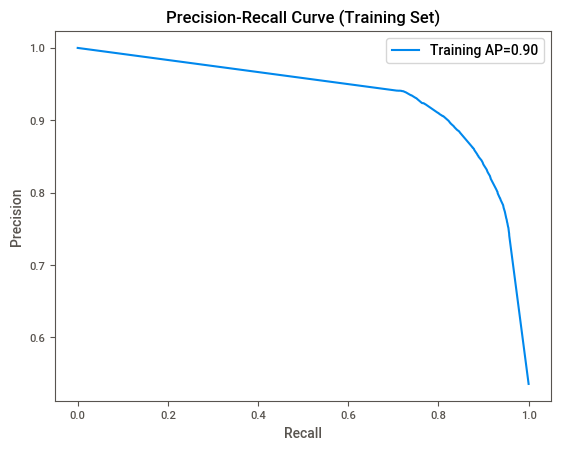

In [60]:
# Precision-Recall Curve for training set
precision_curve_train, recall_curve_train, _ = precision_recall_curve(y_train, cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1])
average_precision_train = average_precision_score(y_train, cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1])

plt.plot(recall_curve_train, precision_curve_train, label=f'Training AP={average_precision_train:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Set)')
plt.legend()
plt.show()

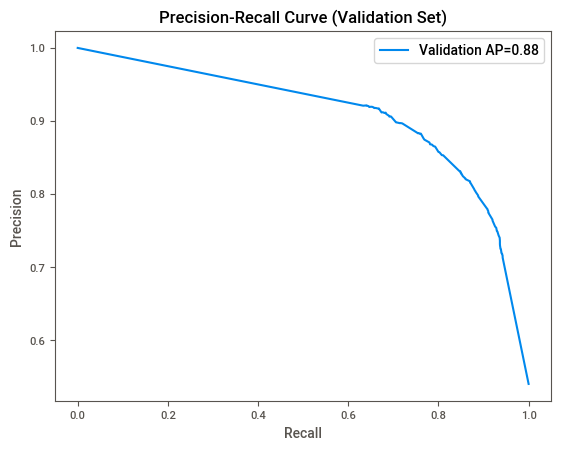

In [61]:
precision_curve_val, recall_curve_val, _ = precision_recall_curve(y_val, cross_val_predict(best_model, X_val, y_val, cv=5, method='predict_proba')[:, 1])
average_precision_val = average_precision_score(y_val, cross_val_predict(best_model, X_val, y_val, cv=5, method='predict_proba')[:, 1])

plt.plot(recall_curve_val, precision_curve_val, label=f'Validation AP={average_precision_val:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Validation Set)')
plt.legend()
plt.show()

## AUC

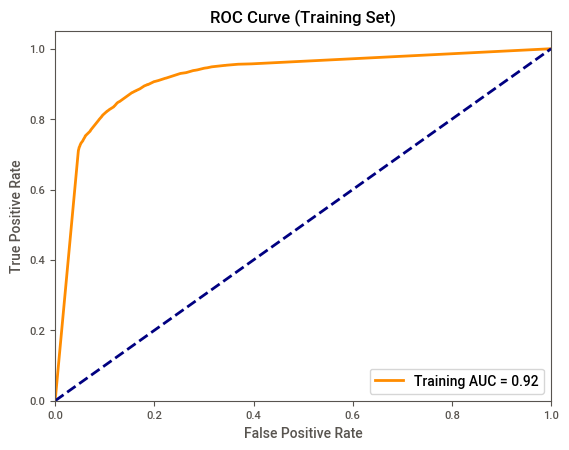

In [62]:
# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

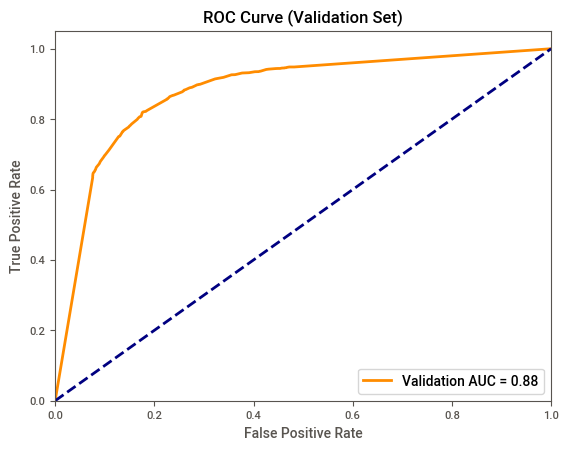

In [63]:
# ROC Curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, cross_val_predict(best_model, X_val, y_val, cv=5, method='predict_proba')[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend(loc="lower right")
plt.show()

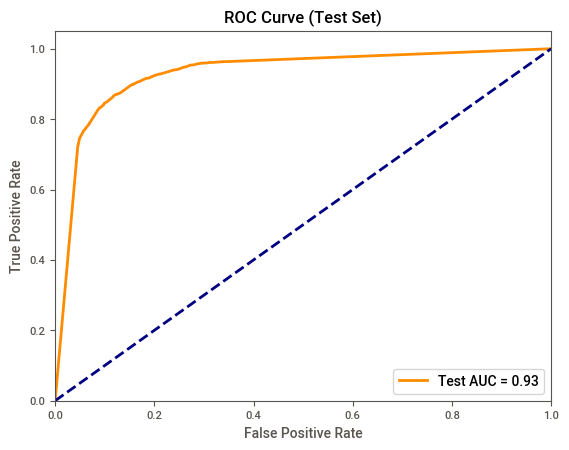

In [64]:
# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()